# Autres régressions 

Un petit panorama avec des explications mathématique de ce que l'on fait : https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/

* régresion pour expliquer/interpréter
* régression/spline pour représenter

## Régessions multiples

$$
y_i \sim \sum_{1 \leq j \leq m} a_j \cdot x_i^j + b
$$

Se résout de la même manière qu'une régression classique.

> TBD vec les Iris, en se basant sur <https://www.datacourses.com/multiple-regression-in-statsmodels-4158/> 

## Polynomiale

Plutôt que d'approximer sur une droite, on approxime sur un polynôme. 

Attention aux bords de la régression, le polynôme pouvant faire un peut n'importe quoi (https://stats.stackexchange.com/questions/226553/why-use-regularisation-in-polynomial-regression-instead-of-lowering-the-degree/226566#226566)

In [11]:
#création des données

import numpy as np
import pandas

rng = np.random.RandomState(1)
x = 8 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

data_rnd = pandas.DataFrame({"x": x, "y": y})

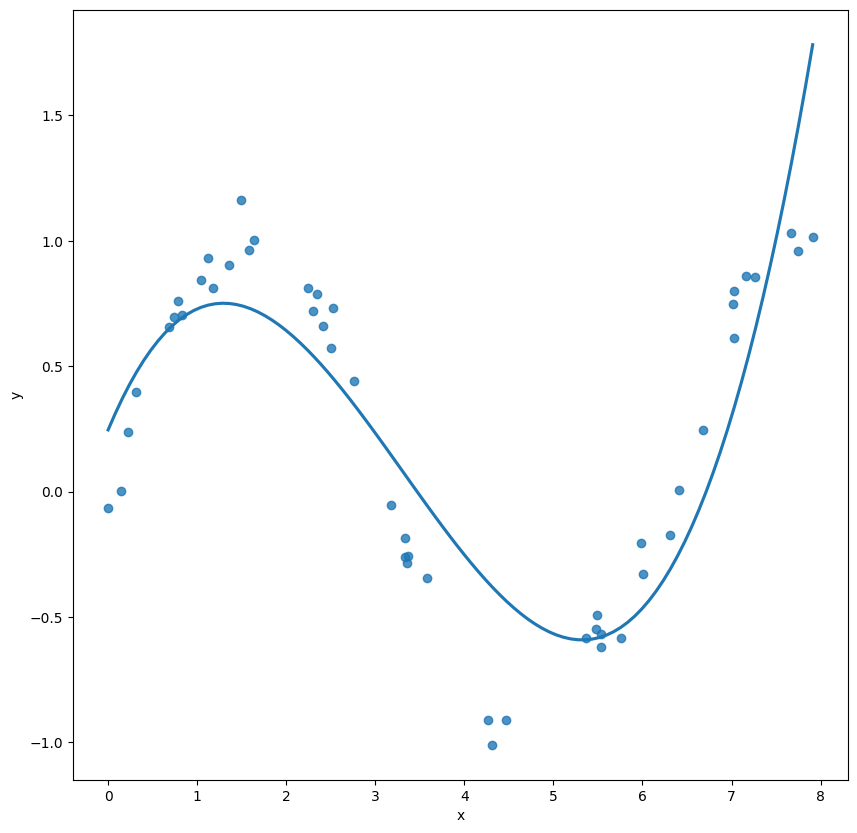

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(order=3,
            x=data_rnd['x'],
            y=data_rnd['y'],
            ci=False,
            truncate=True,
            ax=ax
           )
plt.show()

C'est [`numpy.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) qui est utilisé pour la régression. 

Mais on pourrait aussi utiliser sklearn :
https://ostwalprasad.github.io/machine-learning/Polynomial-Regression-using-statsmodel.html

In [13]:
polynome = np.polyfit(x=data_rnd['x'], y=data_rnd['y'], deg=3)

polynome

array([ 0.04108078, -0.40786419,  0.84987951,  0.24553128])

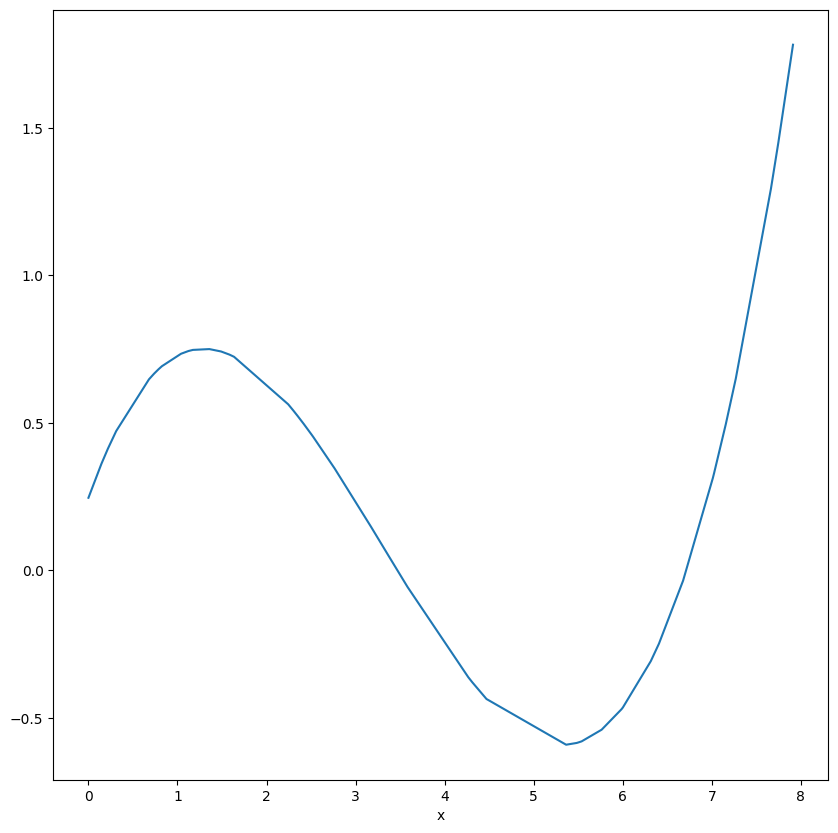

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(
            x=data_rnd['x'],
            y=[np.polyval(polynome, x) for x in data_rnd['x']],
            ax=ax
           )
plt.show()

## Spline (lowess)

https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/

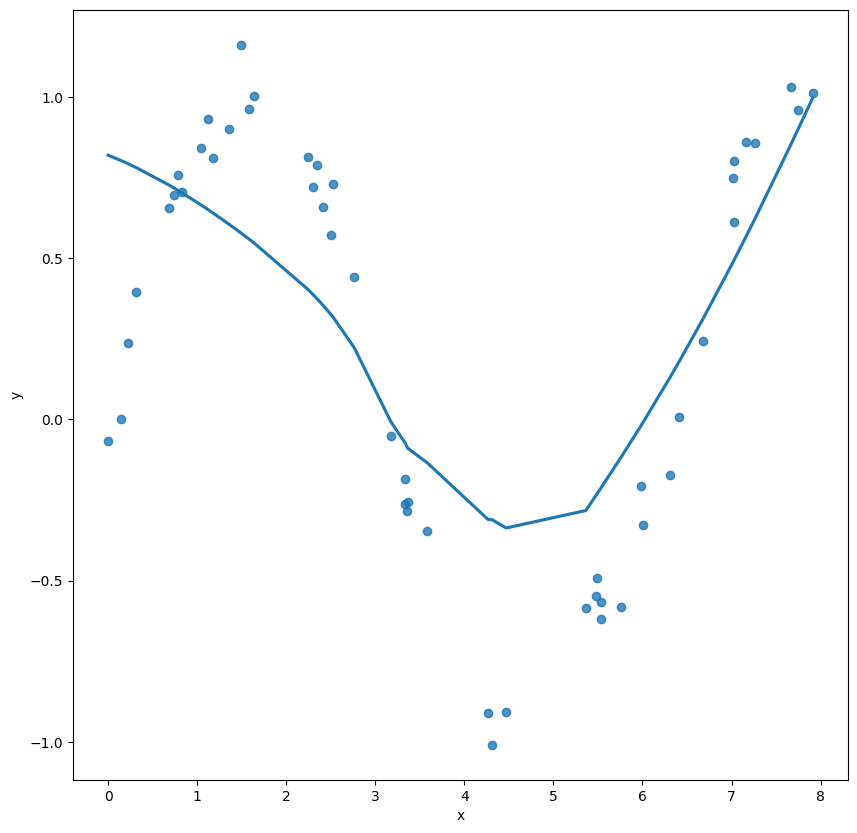

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(lowess=True,
            x=data_rnd['x'],
            y=data_rnd['y'],
            truncate=True,
            ax=ax
           )
plt.show()

https://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html

Dans `statsmodels`, c'est le paramètre `frac` qui permet de régler le pas. Attention, car trop petit et on sur-optimise, trop grand et on est trop loin.

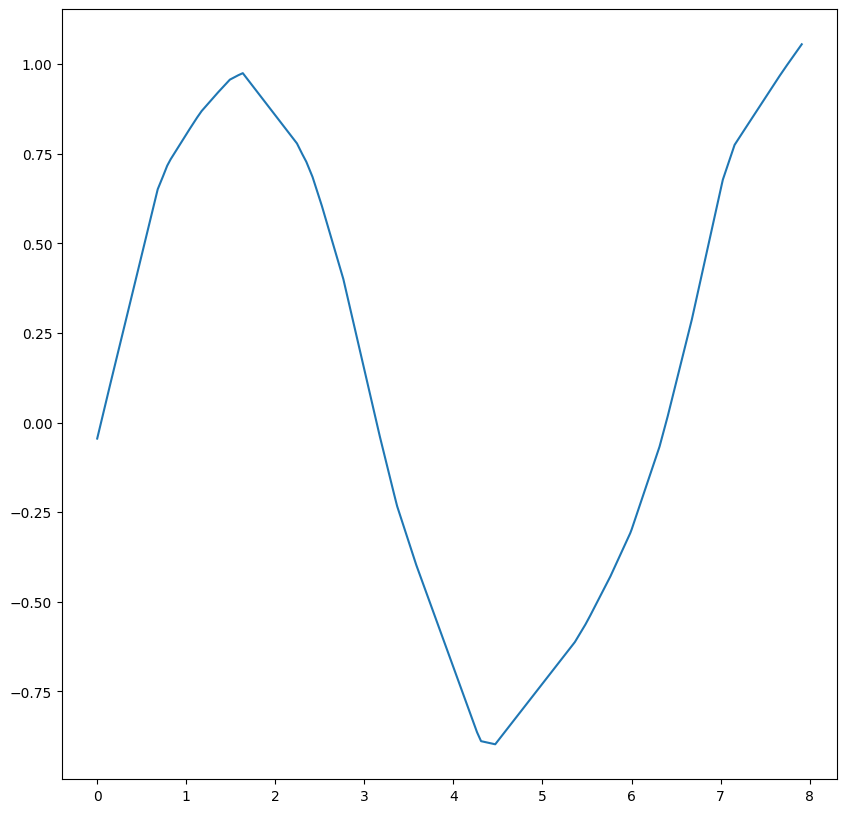

In [16]:
# attention, y et x sont inversés...

import statsmodels.nonparametric.smoothers_lowess

lowess = statsmodels.nonparametric.smoothers_lowess.lowess(data_rnd['y'], data_rnd['x'],
                                                          frac=.2)

fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(
            x=lowess[:, 0],
            y=lowess[:, 1],
            ax=ax
           )
plt.show()

## Logistique

* https://fr.wikipedia.org/wiki/R%C3%A9gression_logistique
* https://towardsdatascience.com/logistic-regression-for-dummies-a-detailed-explanation-9597f76edf46
* https://mashimo.wordpress.com/2017/07/26/logistic-regression-with-python-statsmodels/

Prédire oui ou non pour une variable.

Ici si l'élève fait 5 fautes ou plus.

In [17]:
epreuve = pandas.read_csv("./épreuve.txt", delim_whitespace=True)

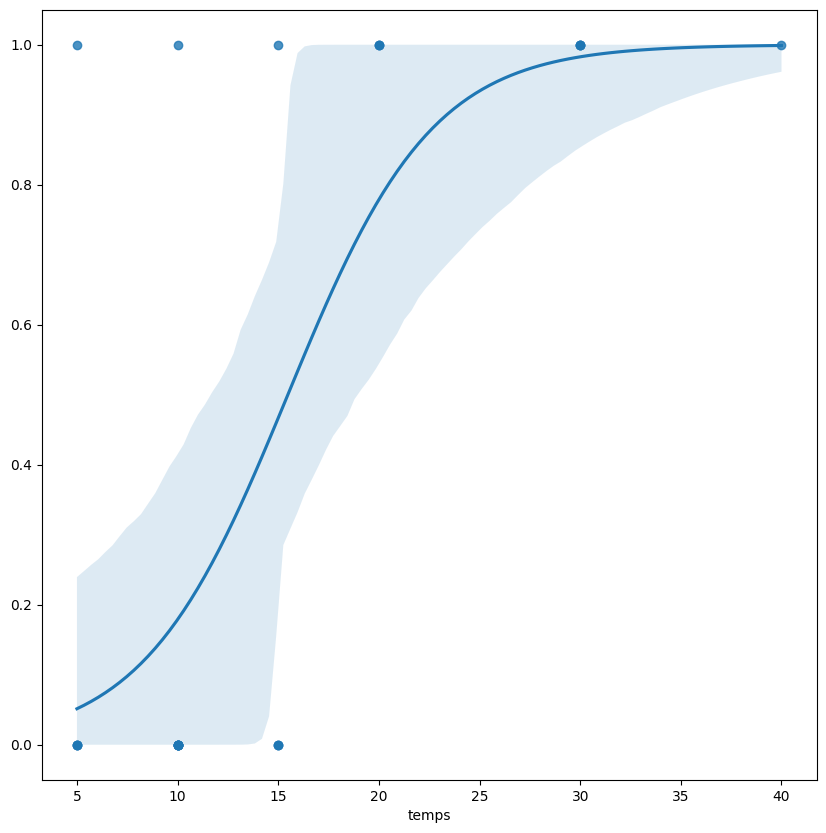

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(logistic=True,
            x=epreuve['temps'],
            y=[1 if x >= 5 else 0 for x in epreuve['erreurs']],
            truncate=True,
            ax=ax
           )
plt.show()

In [19]:
# attention, y et x sont inversés...

import statsmodels.discrete.discrete_model
import statsmodels.api

log_reg = (statsmodels.discrete.discrete_model
            .Logit([1 if x >= 5 else 0 for x in epreuve['erreurs']], 
                   statsmodels.api.add_constant(epreuve['temps']))
            .fit())

log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.382553
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:                          Logit   Df Residuals:                       24
Method:                           MLE   Df Model:                            1
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.4385
Time:                        11:44:32   Log-Likelihood:                -9.9464
converged:                       True   LL-Null:                       -17.713
Covariance Type:            nonrobust   LLR p-value:                 8.108e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3068      1.615     -2.667      0.008      -7.472      -1.141
temps          0.2783      0.114      2.441      0.015       0.055       0.502
==============================================================================
"""

Les paramtètres sont ceux d'une sygmoïde : $\sigma(x)=\frac{1}{1+e^{-\beta_0 +\beta_1 x}}$
La probabilité qu'un élève fasse 5 faute ou plus (que y soit égale à 1) pour un temps t est $\sigma(t)$.

In [20]:
log_reg.params

const   -4.306813
temps    0.278263
dtype: float64

La proba est à 1/2 si : $0 = \beta_0 + \beta_1 x$, donc ici si $temps = \frac{4.306813}{0.278263}$ donc environ 15.5

les raisons du changement :
https://statisticalhorizons.com/in-defense-of-logit-part-2

In [21]:
log_reg.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
temps          0.0337      0.007      5.125      0.000       0.021       0.047
==============================================================================
"""

# Lissage des données

Ce n'est **PAS** une régression. Cela permet lisser les comportements cahotique pour dresser une tendance.

https://serialmentor.com/dataviz/visualizing-trends.html#smoothing

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

**Attention** : Utilisé dans les séries temporelle. On doit donc trier les abscisses pour que le moyennage ait un sens.

In [22]:
data_rnd_sorted = data_rnd.sort_values(by=['x'])

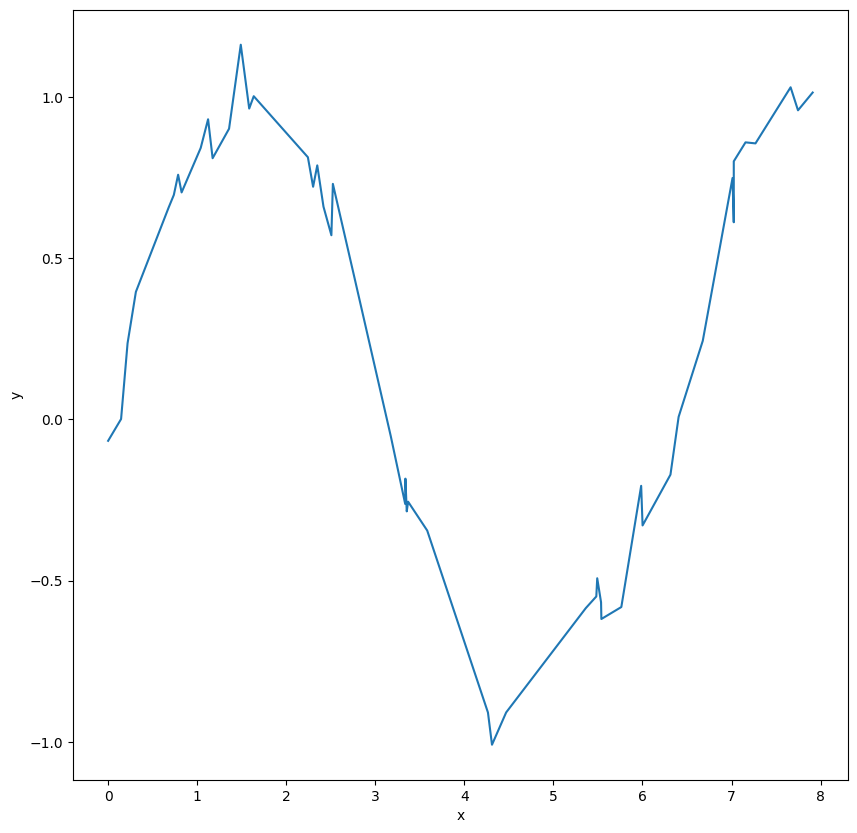

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x=data_rnd_sorted['x'],
             y=data_rnd_sorted['y'],
             ax=ax
            )
plt.show()

In [24]:
rolled = data_rnd_sorted.rolling(5).mean()
rolled

,x,y
2,NaN,NaN
38,NaN,NaN
14,NaN,NaN
27,NaN,NaN
26,0.271823,0.245026
5,0.419382,0.397623
30,0.547475,0.549222
44,0.668817,0.642829
49,0.814375,0.732139
18,0.902923,0.786906


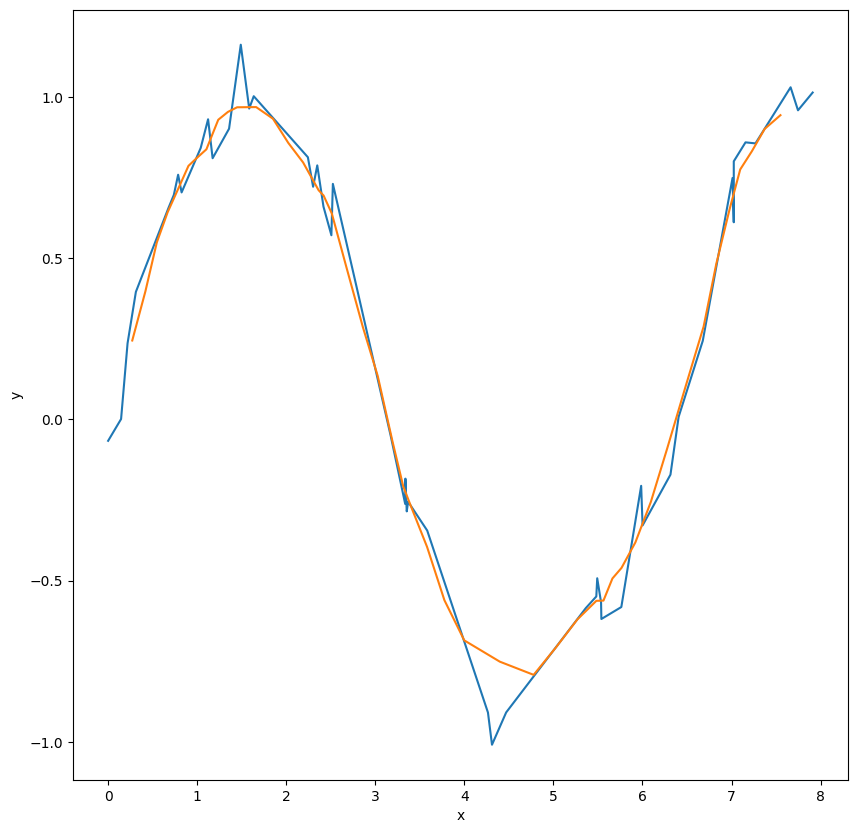

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x=data_rnd_sorted['x'],
             y=data_rnd_sorted['y'],
             ax=ax
            )
sns.lineplot(x=rolled['x'],
             y=rolled['y'],
             ax=ax
            )
plt.show()


